In [51]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [52]:
def create_random_dataset(num_rows=5000):
    """
    Creates a random dataset with specified columns.

    Args:
        num_rows: The number of rows in the dataset (default: 5000).

    Returns:
        A pandas DataFrame containing the random dataset.
    """

    names = [
        "Alice", "Bob", "Charlie", "David", "Emily", "Frank", "Grace", "Henry", "Isabella", "Jack",
        "Katherine", "Liam", "Mia", "Noah", "Olivia", "Peter", "Quinn", "Rachel", "Samuel", "Taylor",
        "Ursula", "Victor", "Wendy", "Xavier", "Yasmine", "Zachary",  # Add more names for variety
        "Sophia", "Jackson", "Ava", "Ethan", "Chloe", "Daniel", "Abigail", "Matthew", "Madison", "Alexander",
        "Ella", "Michael", "Avery", "James", "Scarlett", "Benjamin", "Sofia", "Elijah", "Camila", "Logan"
    ]
    
    # More variety for jobs
    jobs = [
        "Software Engineer", "Data Scientist", "Teacher", "Nurse", "Accountant", "Project Manager",
        "Marketing Specialist", "Sales Representative", "Chef", "Electrician", "Mechanic", "Construction Worker",
        "Doctor", "Lawyer", "Artist", "Musician", "Writer", "Journalist", "Web Developer", "Graphic Designer",
        "Data Analyst", "Business Analyst", "Financial Analyst", "HR Manager", "Recruiter", "Customer Service Rep",
        "Product Manager", "Operations Manager", "Research Scientist", "Pharmacist", "Physical Therapist", "Social Worker"
        , "Librarian", "Architect", "Civil Engineer", "Mechanical Engineer", "Electrical Engineer"
    ]

    provinces = [
        "Ontario", "Quebec", "British Columbia", "Alberta", "Manitoba", "Saskatchewan",
        "Nova Scotia", "New Brunswick", "Newfoundland and Labrador", "Prince Edward Island"
    ]


    data = []
    for _ in range(num_rows):
        name = random.choice(names) + " " + random.choice(names)  # Combine first and last names
        age = random.randint(18, 65)  # Realistic age range
        tenure = random.randint(0, min(age - 18, 30)) #Tenure cannot be longer than working life, limit to 30 for variety
        job = random.choice(jobs)
        province = random.choice(provinces)
        rural_indicator = random.choice(["Rural", "Urban"])

        data.append([name, age, tenure, job, province, rural_indicator])

    df = pd.DataFrame(data, columns=["Name", "Age", "Tenure", "Job", "Province", "Rural_Indicator"])
    return df


# --- Main program execution ---
if __name__ == "__main__":
    random_data = create_random_dataset()

In [53]:
random_data

,Name,Age,Tenure,Job,Province,Rural_Indicator
0,Olivia Jack,30,1,Nurse,New Brunswick,Rural
1,Alexander Camila,26,8,Web Developer,Quebec,Urban
2,Madison Zachary,30,9,Artist,Quebec,Urban
3,Ethan Henry,51,29,Writer,Nova Scotia,Rural
4,Katherine Henry,63,14,Construction Worker,New Brunswick,Urban
...,...,...,...,...,...,...
4995,David Bob,35,10,Financial Analyst,Manitoba,Urban
4996,Charlie Abigail,63,8,Marketing Specialist,Quebec,Rural
4997,Xavier Chloe,56,23,Data Analyst,Newfoundland and Labrador,Urban
4998,Yasmine Scarlett,57,23,Musician,Alberta,Rural


In [54]:
print("\nDescriptive Statistics:")
print(random_data.describe())


Descriptive Statistics:
               Age       Tenure
count  5000.000000  5000.000000
mean     41.481800    10.475200
std      13.726272     8.628527
min      18.000000     0.000000
25%      30.000000     3.000000
50%      42.000000     8.000000
75%      53.000000    17.000000
max      65.000000    30.000000


In [6]:
print(random_data.describe(include='object'))

             Name                 Job Province Rural_Indicator
count        5000                5000     5000            5000
unique       1921                  37       10               2
top     Sofia Ava  Research Scientist  Ontario           Urban
freq           10                 163      554            2529


In [7]:
for col in ['Age', 'Province']:  # List your categorical columns
    print(f"\nValue Counts for {col}:")
    print(random_data[col].value_counts())


Value Counts for Age:
Age
40    132
64    123
51    122
38    119
32    119
53    117
28    116
65    115
31    112
48    112
58    111
60    111
42    110
45    109
56    109
46    108
47    108
34    108
52    107
43    107
20    107
26    106
49    106
44    106
22    105
59    105
35    103
63    102
30    101
61    100
41    100
21     99
33     98
36     98
55     97
62     97
24     97
27     96
18     96
23     95
57     95
19     92
39     92
37     89
25     87
54     87
50     85
29     84
Name: count, dtype: int64

Value Counts for Province:
Province
Ontario                      554
New Brunswick                516
Nova Scotia                  505
Prince Edward Island         505
Quebec                       498
Newfoundland and Labrador    494
British Columbia             493
Manitoba                     491
Saskatchewan                 477
Alberta                      467
Name: count, dtype: int64


In [56]:
rd = random_data

In [58]:
print(rd.describe())

               Age       Tenure
count  5000.000000  5000.000000
mean     41.481800    10.475200
std      13.726272     8.628527
min      18.000000     0.000000
25%      30.000000     3.000000
50%      42.000000     8.000000
75%      53.000000    17.000000
max      65.000000    30.000000


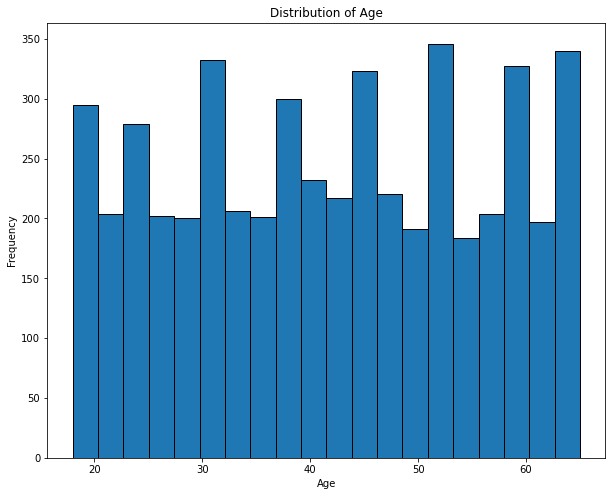

In [9]:
# --- Histograms (for numerical variables) ---
plt.figure(figsize=(10, 8))  # Adjust figure size
plt.hist(rd['Age'], bins=20, edgecolor='black')  # 'bins' controls the number of bars
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

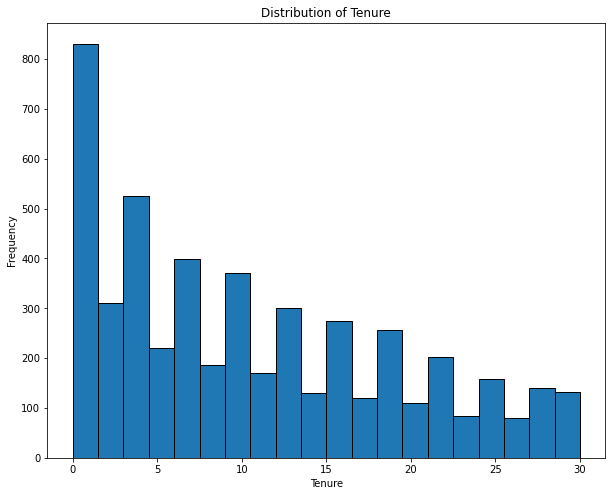

In [10]:
# --- Histograms (for numerical variables) ---
plt.figure(figsize=(10, 8))  # Adjust figure size
plt.hist(rd['Tenure'], bins=20, edgecolor='black')  # 'bins' controls the number of bars
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

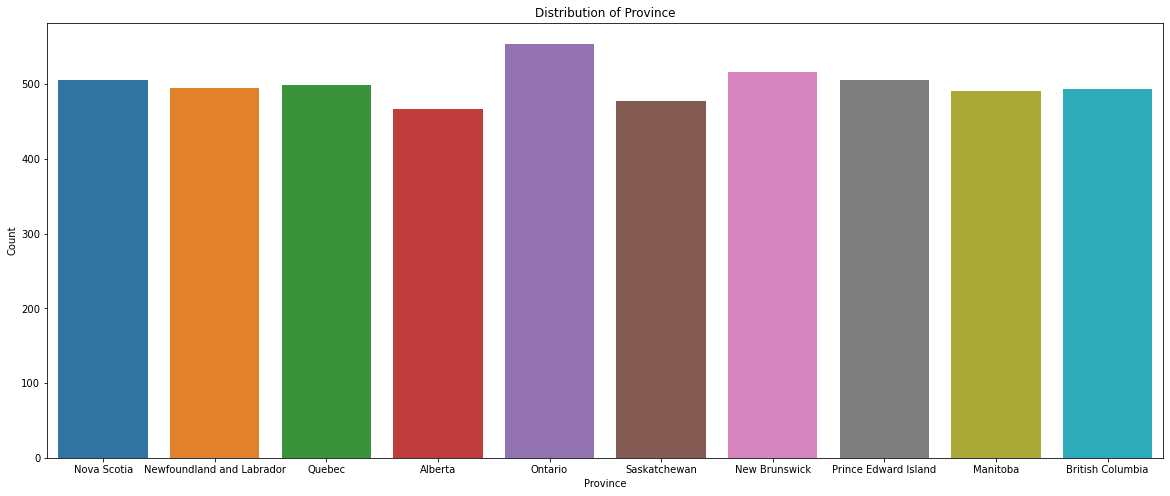

In [11]:
# --- Bar Plots (for categorical variables) ---
plt.figure(figsize=(20, 8))
sns.countplot(x='Province', data=rd) # Using Seaborn for a cleaner plot
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Province')
plt.show()

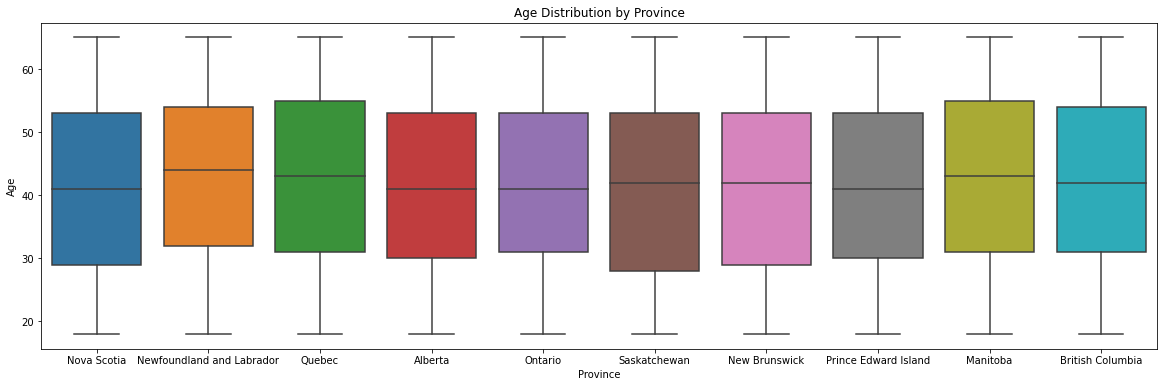

In [12]:

# --- Box Plots (for comparing distributions) ---
plt.figure(figsize=(20, 6))
sns.boxplot(x='Province', y='Age', data=rd)
plt.xlabel('Province')
plt.ylabel('Age')
plt.title('Age Distribution by Province')
plt.show()

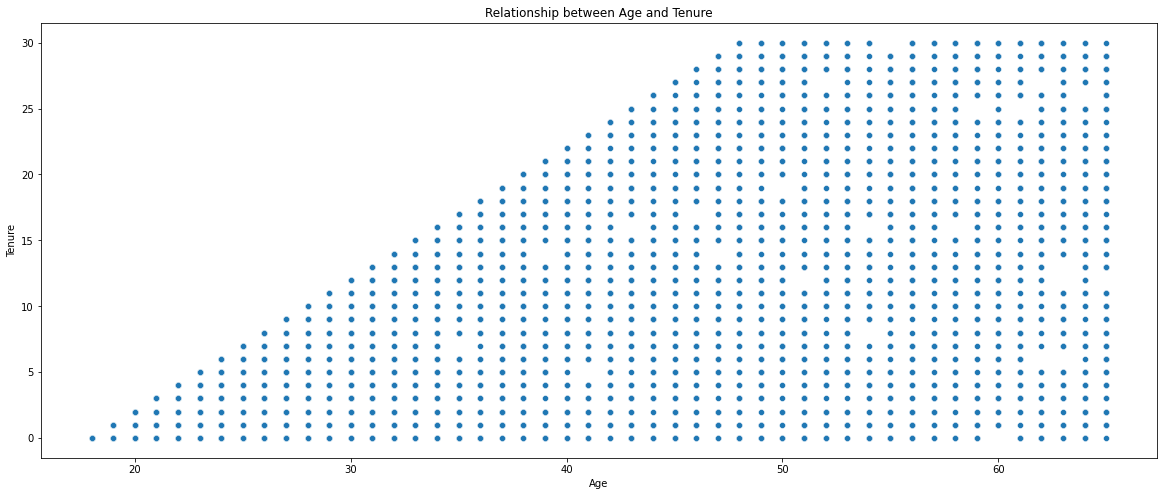

In [13]:
# --- Scatter Plots (for relationships between numerical variables) ---
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Age', y='Tenure', data=rd)
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.title('Relationship between Age and Tenure')
plt.show()

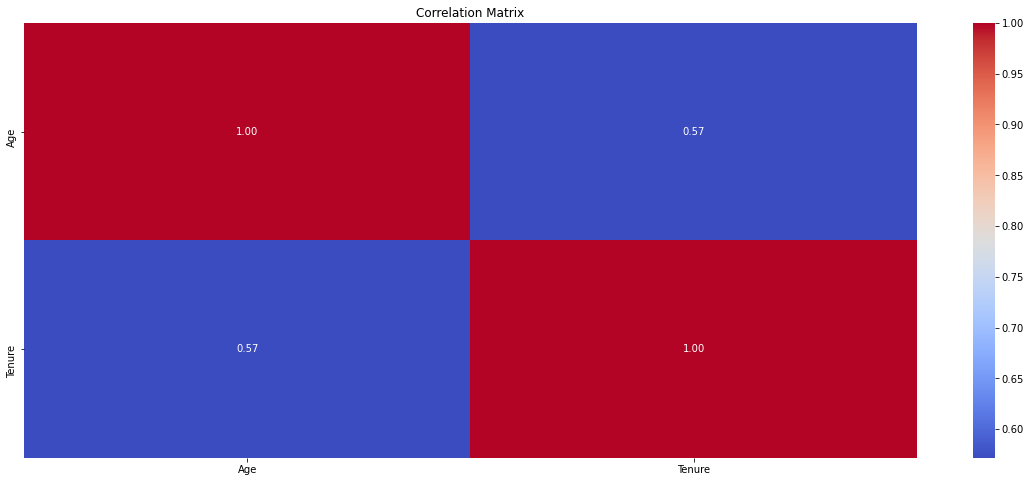

In [14]:
# --- Heatmap (for correlation matrix) ---
# Calculate the correlation matrix
correlation_matrix = rd.corr(numeric_only = True) # Only include numeric

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [59]:
df2 = rd
print(df2.describe())

               Age       Tenure
count  5000.000000  5000.000000
mean     41.481800    10.475200
std      13.726272     8.628527
min      18.000000     0.000000
25%      30.000000     3.000000
50%      42.000000     8.000000
75%      53.000000    17.000000
max      65.000000    30.000000


In [66]:
df2_sorted = df2.sort_values(by='Age')
df2_sorted

,Name,Age,Tenure,Job,Province,Rural_Indicator
2001,Sofia Matthew,18,0,Lawyer,British Columbia,Urban
4172,Alexander Michael,18,0,Construction Worker,Saskatchewan,Rural
4148,Madison Michael,18,0,Marketing Specialist,Prince Edward Island,Rural
2154,Alexander Katherine,18,0,Lawyer,Saskatchewan,Rural
4141,Rachel Liam,18,0,Research Scientist,Manitoba,Urban
...,...,...,...,...,...,...
2765,Ella Avery,65,2,HR Manager,British Columbia,Rural
4366,Chloe Grace,65,7,Nurse,Manitoba,Rural
2074,Charlie Grace,65,1,Teacher,Newfoundland and Labrador,Rural
1178,James Avery,65,23,Financial Analyst,Manitoba,Urban


In [73]:
columns_to_remove = ['Name', 'Job', 'Province', 'Rural_Indicator']
df3 = df2.drop(columns = columns_to_remove, errors='ignore')
df3

,Age,Tenure
0,30,1
1,26,8
2,30,9
3,51,29
4,63,14
...,...,...
4995,35,10
4996,63,8
4997,56,23
4998,57,23


In [70]:
def cluster_data_kmeans(df3, n_clusters=10):
            
    #Scale Numerical Features
    numerical_cols = ['Age', 'Tenure']
    scaler = StandardScaler()
    df3[numerical_cols] = scaler.fit_transform(df3[numerical_cols])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Initialize KMeans
    df3['cluster'] = kmeans.fit_predict(df3)  # Fit and predict clusters
    
    return df3

In [71]:
clustered_data = cluster_data_kmeans(df3.copy(), n_clusters=10)

In [64]:
df_sorted = clustered_data.sort_values(by='cluster')
df_sorted

,Age,Tenure,cluster
0,-0.836567,-1.098235,0
4188,-1.273729,-0.634610,0
4189,-0.982288,-0.750516,0
570,-0.763707,-0.634610,0
2119,-1.055148,-1.098235,0
...,...,...,...
1089,0.183477,-0.750516,9
4043,0.256337,-0.634610,9
1083,0.402058,-0.982328,9
4017,-0.253685,-0.634610,9


In [74]:
def cluster_data_kmeans(df3, n_clusters=10):
                
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Initialize KMeans
    df3['cluster'] = kmeans.fit_predict(df3)  # Fit and predict clusters
    
    return df3

In [75]:
clustered_data2 = cluster_data_kmeans(df3.copy(), n_clusters=10)

In [76]:
df_sorted2 = clustered_data2.sort_values(by='cluster')
df_sorted2

,Age,Tenure,cluster
2990,42,18,0
1832,38,18,0
1839,41,21,0
3398,46,18,0
1846,40,20,0
...,...,...,...
1362,35,0,9
171,38,7,9
2979,37,3,9
4311,38,3,9


In [86]:
df_sorted2.to_excel("~/Documents/kmeans.xlsx", index=False)

<ipython-input-86-8b7e4eb31704>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_sorted2.to_excel("~/Documents/kmeans.xlsx", index=False)


In [84]:
pip install --upgrade xlsxwriter


     |████████████████████████████████| 165 kB 10.8 MB/s eta 0:00:01
  Attempting uninstall: xlsxwriter
    Found existing installation: XlsxWriter 1.3.7
    Uninstalling XlsxWriter-1.3.7:
      Successfully uninstalled XlsxWriter-1.3.7
Note: you may need to restart the kernel to use updated packages.
